# Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.

# Name / Data Type / Measurement Unit / Description
Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years.

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [1]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


After examining the data set we can clearly see that this data set is having set of information about Abalone,one type of snail.The dataset consissts of Abalone's characteristics which helps to determine the age of the Abalone by counting the rings given with the help of microscope.if we distinguish closely we can separate the dataset by three parts:- 1)Sex 2)Size 3)Weight and the target variable Rings. Sex,the classification column consists of three types,which are,M=Male,F=Female,I=Infant.we have three columns for size group,which is continuous and independent,they are Length,Diameter and Height and lastly we have four independent and continuous column for weight group,which are Whole weight,shucked weight,Viscera weight and Shell weight.

In [3]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

By checking the type of datatypes we find that Sex column is categorical and the type is object,Length,Diameter,Height Whole weight,Shucked weight,Viscera weight,Shell weight are float in type and the Rings the target variable is integer in type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.shape

(4177, 9)

The dataset is having 4177 rows and 9 columns,that means we have the characteristic features of 4177 abalones,whoose age is to be determined.

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Found out all the names of the columns in the dataset.

In [7]:
#CHECKING IS THERE ANY NULL VALUES

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no missing values in the data set as each and every column is showing 0 null values.

In [8]:
#understand data at high level.check statistics of dataset.

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


All the count result is equal that means there is no missing values present in the dataset.The data set is not normally distibitued but close to normal distribution.we can see that the minimum height is 0,which is kind of abnormal.the quartile ranes are good in shape.

Encoding the Sex column as it is categorical in nature.

In [9]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


After encoding the sex column,the values of sex column is changed as F(Female)=0,I(Infant)=1,M(Male)=2.

# UniVariate Analysis:-

In [10]:
#checking unique values in "Sex" variable.

df['Sex'].unique()

array([2, 0, 1])

F(Female)=0,I(Infant)=1,M(Male)=2.

In [11]:
#counting the "Sex" variable

df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Total no of values present in Male(2)=1528,Infant(1)=1342,Female(0)=1307

<AxesSubplot:xlabel='Sex', ylabel='count'>

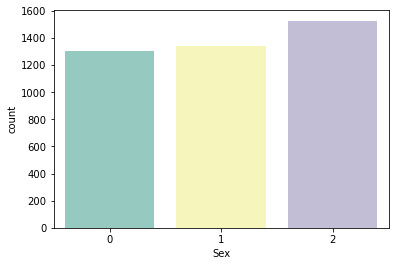

In [12]:
sns.countplot(x = 'Sex', data = df, palette="Set3")

We can see that Male amount of Abalones have higer majority,then Infant and after that Female respectively.

Text(0.5, 1.0, 'Rings vs length and sex')

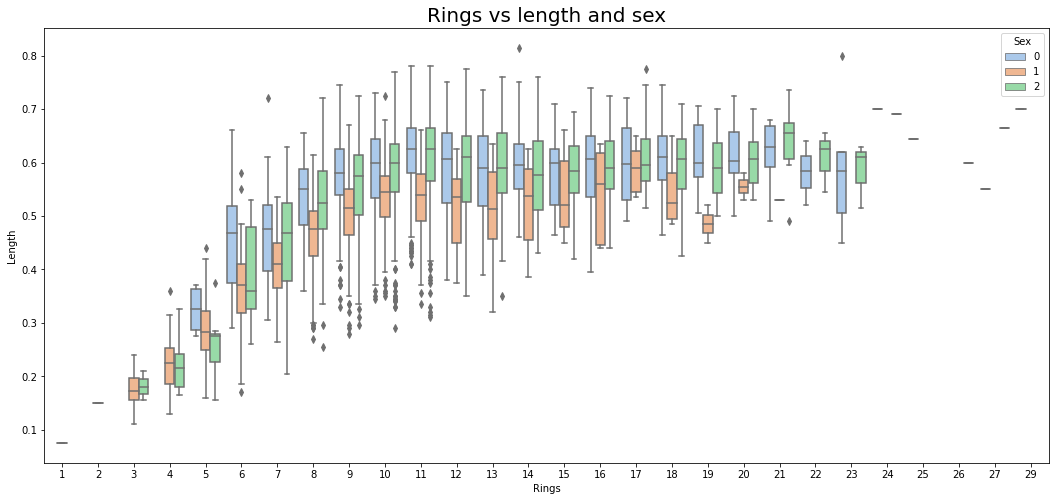

In [13]:

# plotting a hue plot

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(df['Rings'], df['Length'], hue = df['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

We can see infants are higher in nos,which are green in color here, we clearly picturize outliers present in Length column

Text(0.5, 1.0, 'Rings vs diameter and sex')

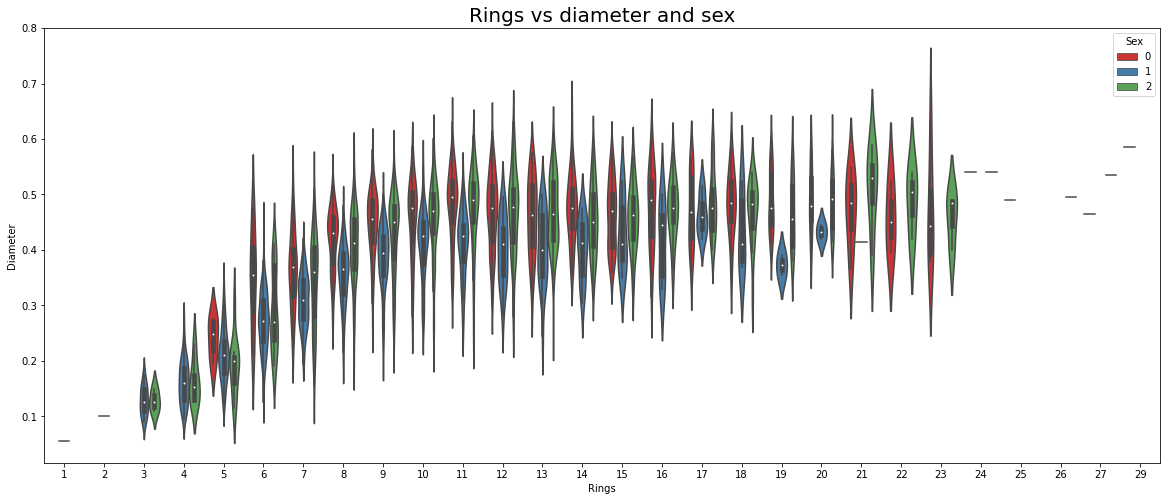

In [14]:
# rings vs diameter and sex

plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(df['Rings'], df['Diameter'], hue = df['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs height and sex')

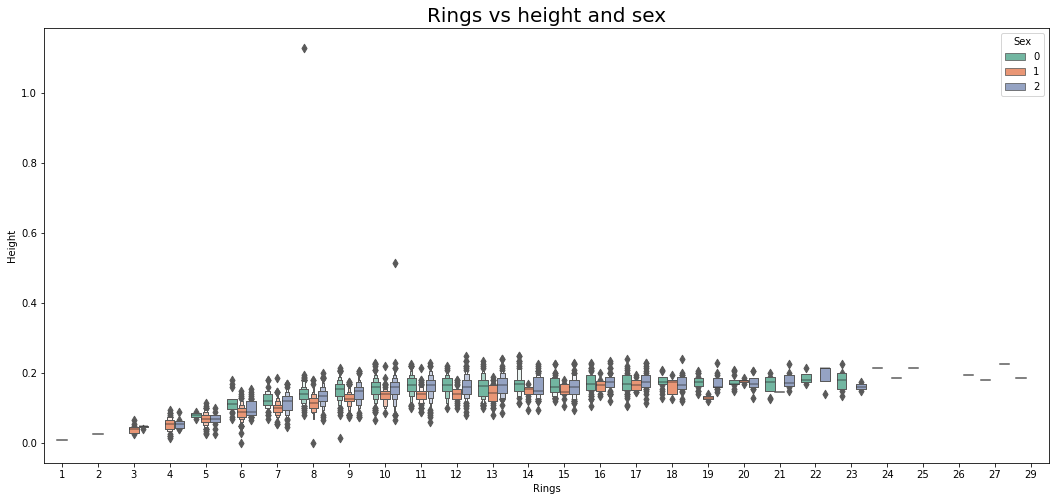

In [15]:
# rings vs height and sex

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(df['Rings'], df['Height'], hue = df['Sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

we can find outliers in Height while comparing it with Rings an sex.The range of height is very small 0.0 to 1.0,so all the data is important.

Text(0.5, 1.0, 'Rings vs weight')

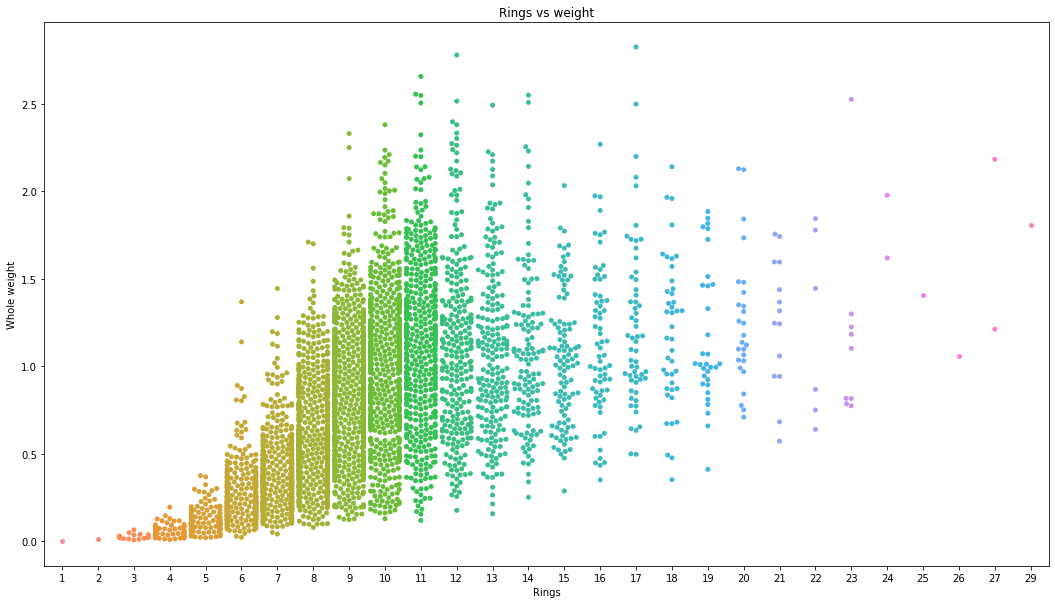

In [16]:
# ring vs weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Whole weight'])
plt.title('Rings vs weight')

The range of whole weight is also very small,from 0.0 to 2.5.We can also find the highest amount of abalones is in this dataset is having 11 rings.May be the the abalones having 11 Rings have the same age.

Text(0.5, 1.0, 'Rings vs shucked weight')

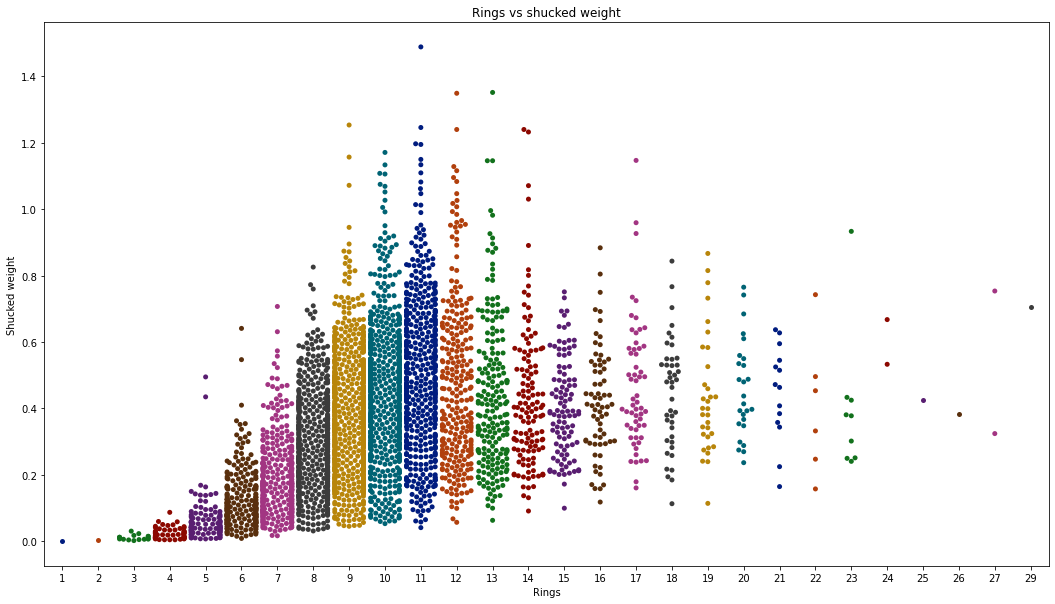

In [17]:
# ring vs shucked weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Shucked weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

It is clearly visible about the shucked weight and the rings of the abalones

Text(0.5, 1.0, 'Rings vs Viscera Weight')

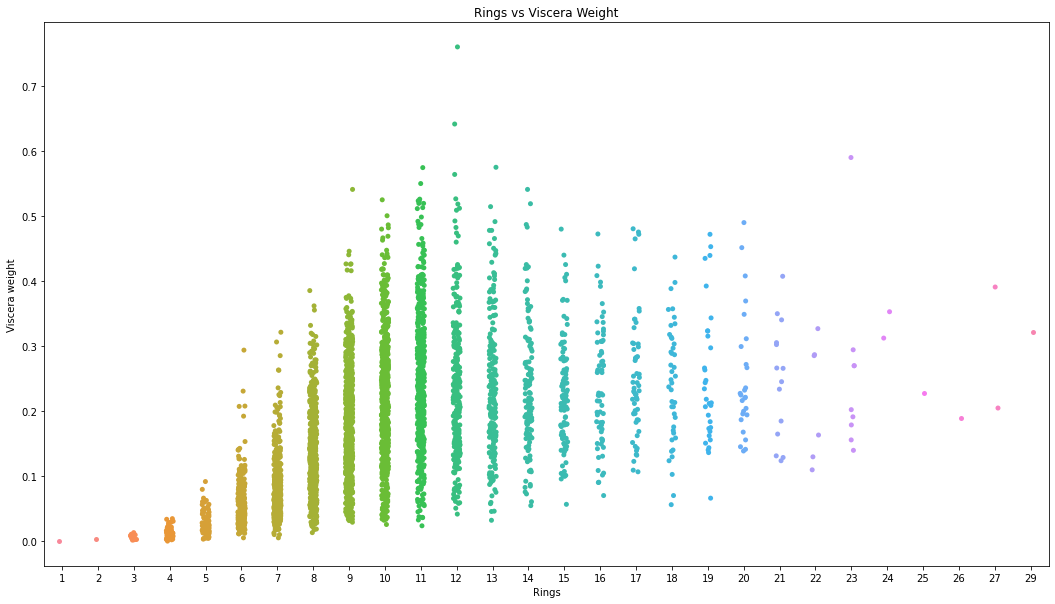

In [18]:
# ring vs viscera weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.stripplot(df['Rings'], df['Viscera weight'])
plt.title('Rings vs Viscera Weight')

The viscera range is also very samall,0.0-0.7.By this stripplot we can conclude that various Abalones have various viscera weight.

Text(0.5, 1.0, 'Rings vs Shell weight')

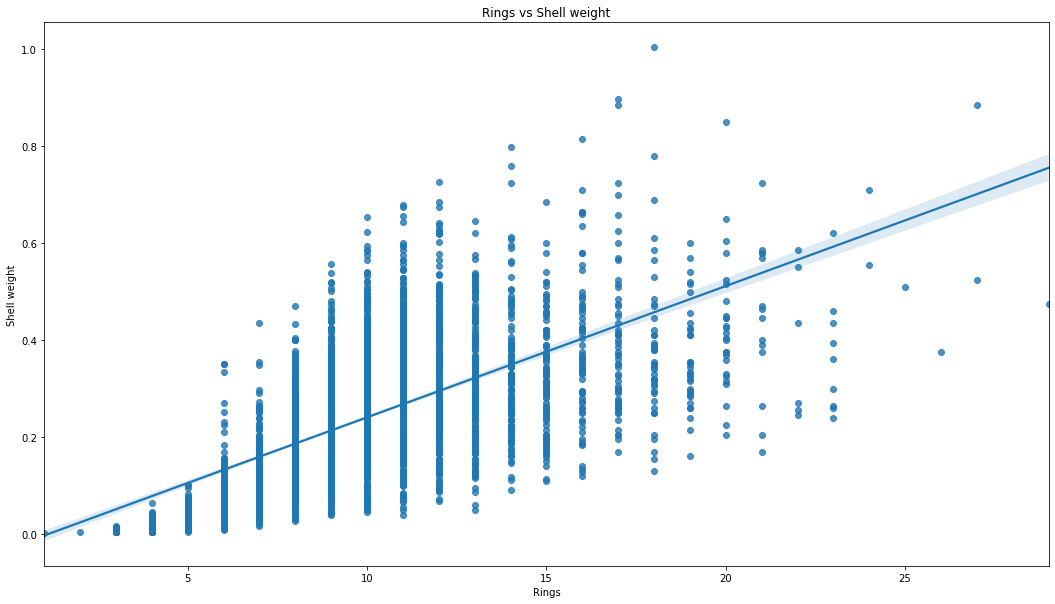

In [19]:
# ring vs shell weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(df['Rings'], df['Shell weight'])
plt.title('Rings vs Shell weight')

The shell weight is having range 0.0 to 1.0.

# Let's visualize how data is distributed for every continuous column:

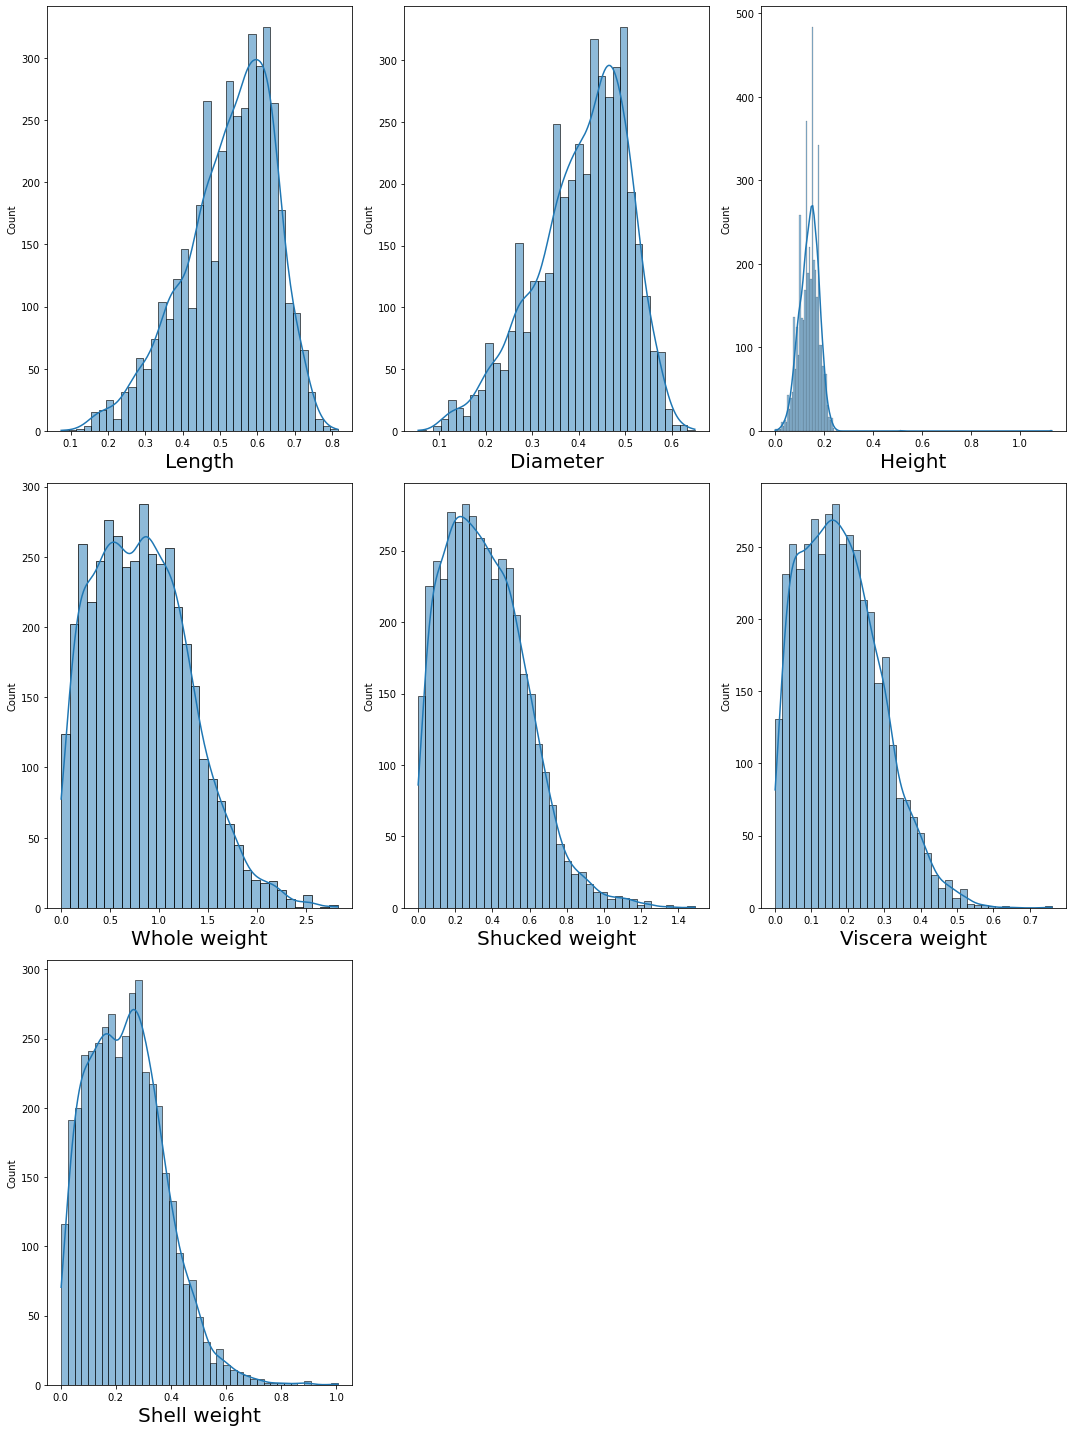

In [20]:
# only taking the continuous features:
df_features = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From above Histograms we can see that there is a skewness in 'Height' data as 0 is not a possible 'Height'. And most of all data has little bit of Skewness. Mainly 'Whole weight','Shucked weight','Viscera weight', 'Shell weight' columns are little right skewed and 'Length', 'Diameter' columns are a bit left skewed. We will treat these skewness on the latter part.

In [21]:
df_features.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

We can see that Length and Diameter column is having little bit of left skewness,and the whole weight,shucked weight,Viscera weight and Shell weight is having little bit of Right skewnees.Height is having very much skewness.we will remove the skewness by various skewness removal techniques.

# Bivariate Analysis and Multivariate Analysis:
To see the relationship between Feature Vs label we need to Divide the data into Featues and Labels.

Dividing the dataset into features and label:

In [22]:

y = df['Rings']
x = df.drop(columns=['Rings'])
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# Checking the relationship between features and label(Rings).

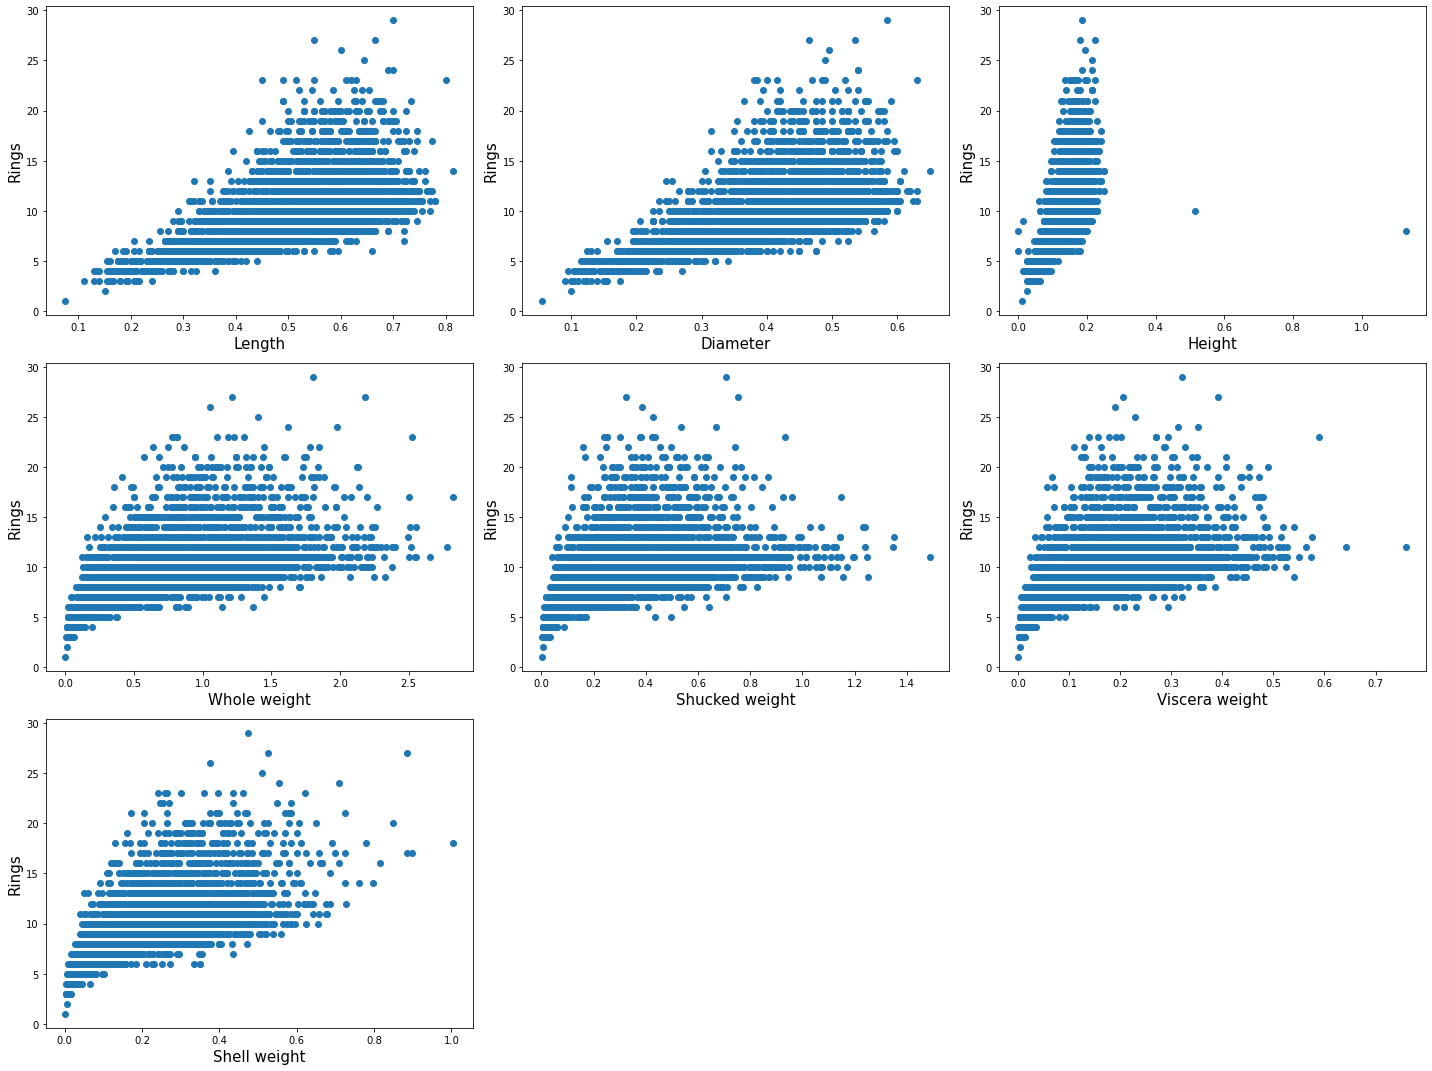

In [23]:

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Rings',fontsize=15)
    plotnumber+=1
plt.tight_layout()

we need to visualize the relation between the target variable Rings with the features columns to predict the age of the Abalones.we can see outliers in every scatter plot above,Height vs Rings have two outliers clearly visible which is farway from the datas available.we need remove this outliers present.

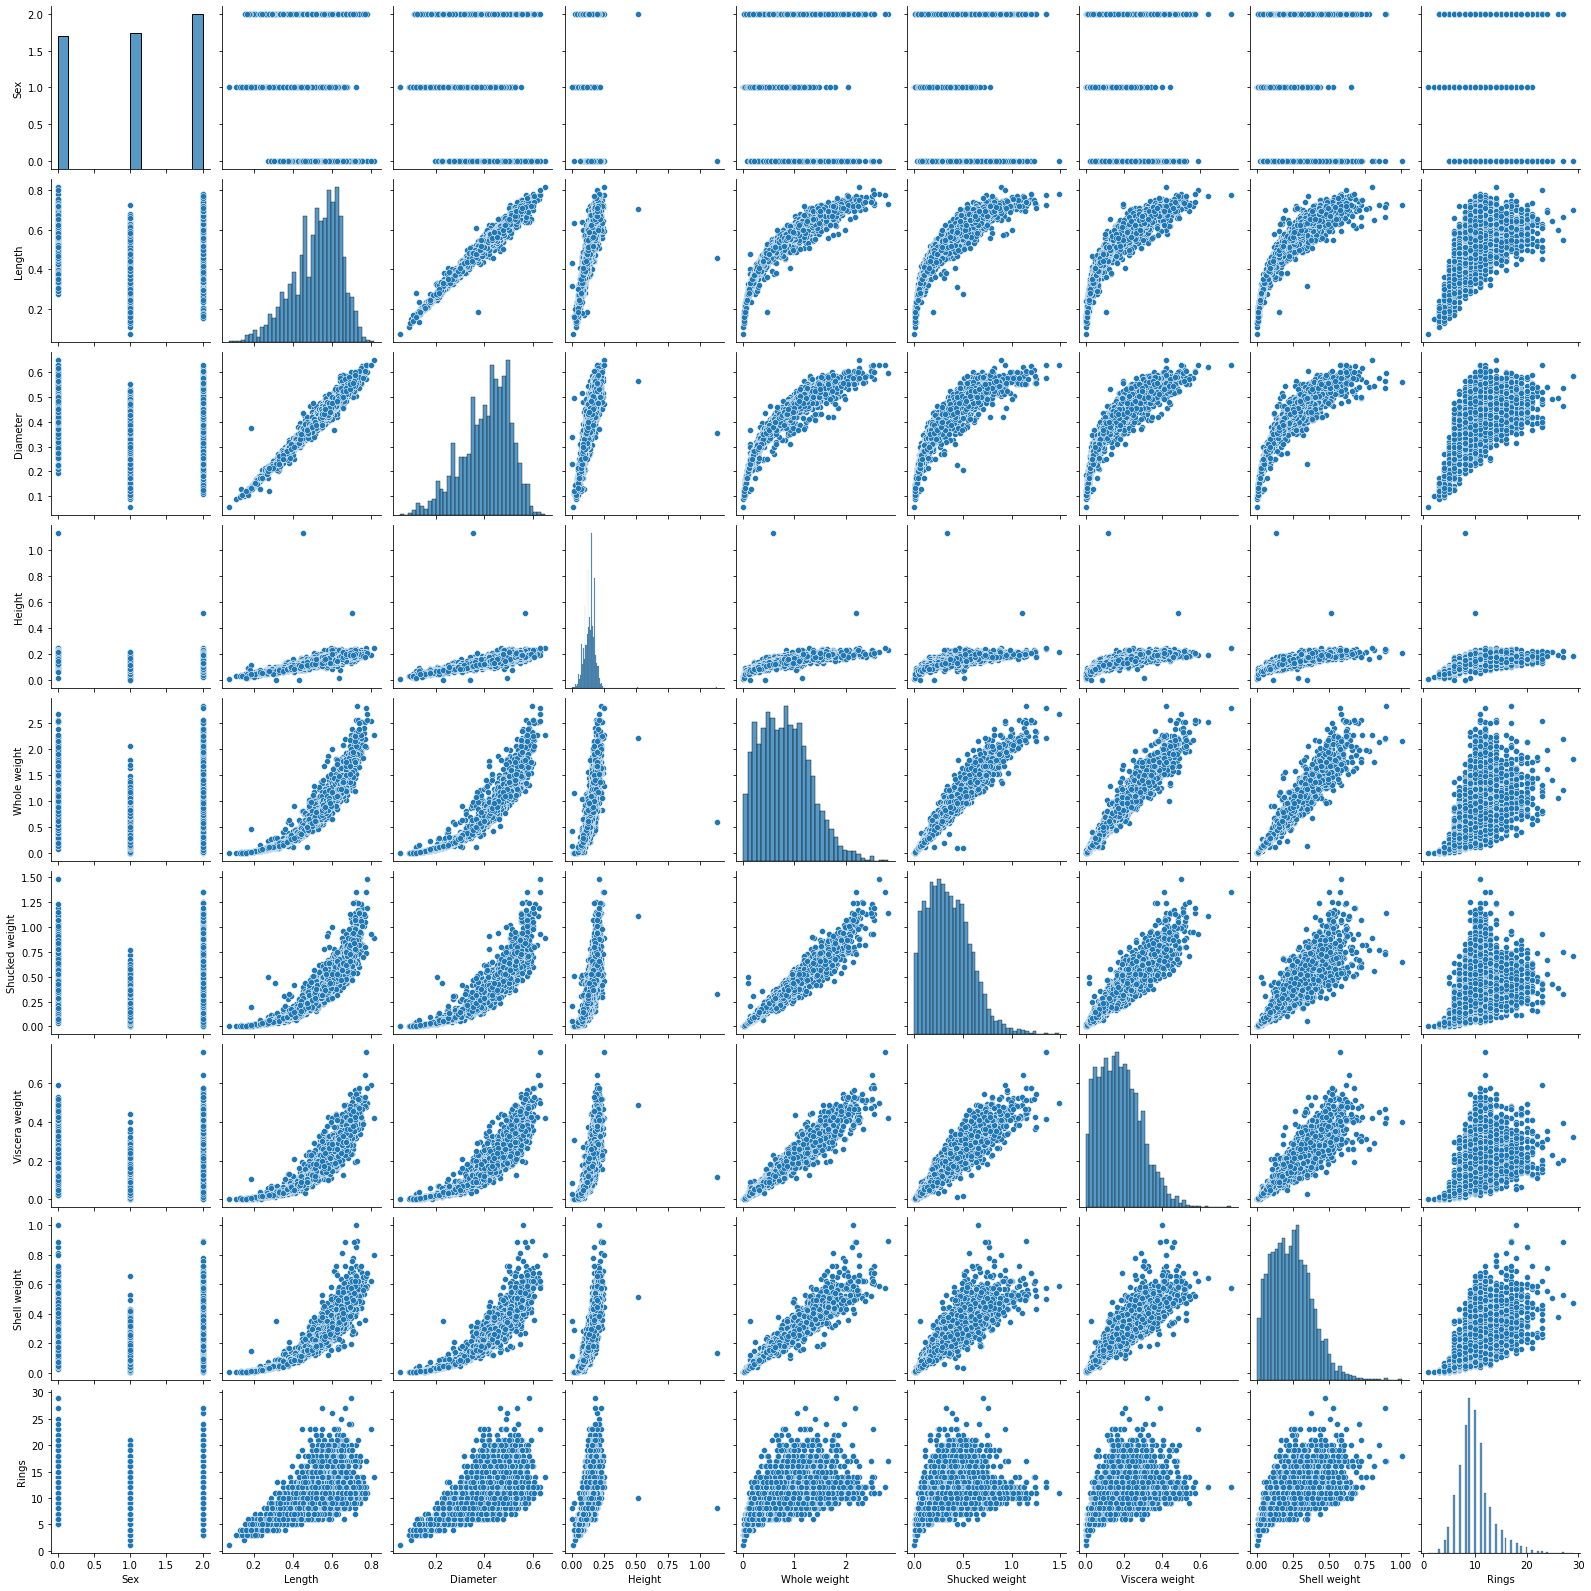

In [24]:
sns.pairplot(df)

We can see that the relations of rings with the variables length, diameter, and height looks linear and length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight. Rings can be seen linear with most of the variables, but we need to confirm it in order to be sure.

In [25]:
# Multicolinearity Detection

corr = df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Heat Map:-

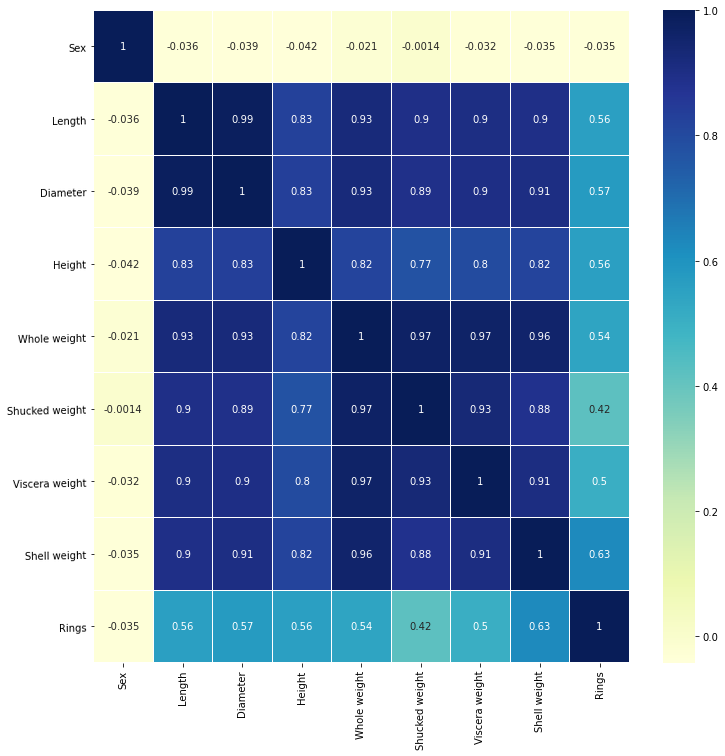

In [26]:
#Checking multicoliniearity ofFeature vs Feature and Feature vs Label with Heat map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=.1,cmap='YlGnBu', annot=True)
plt.yticks(rotation=1);

The columns are corelated to each other mostly.Length and Diameter is highly co related,length and whole weight is also highly co related.whole weight is also highly corelated with the other weight variables.

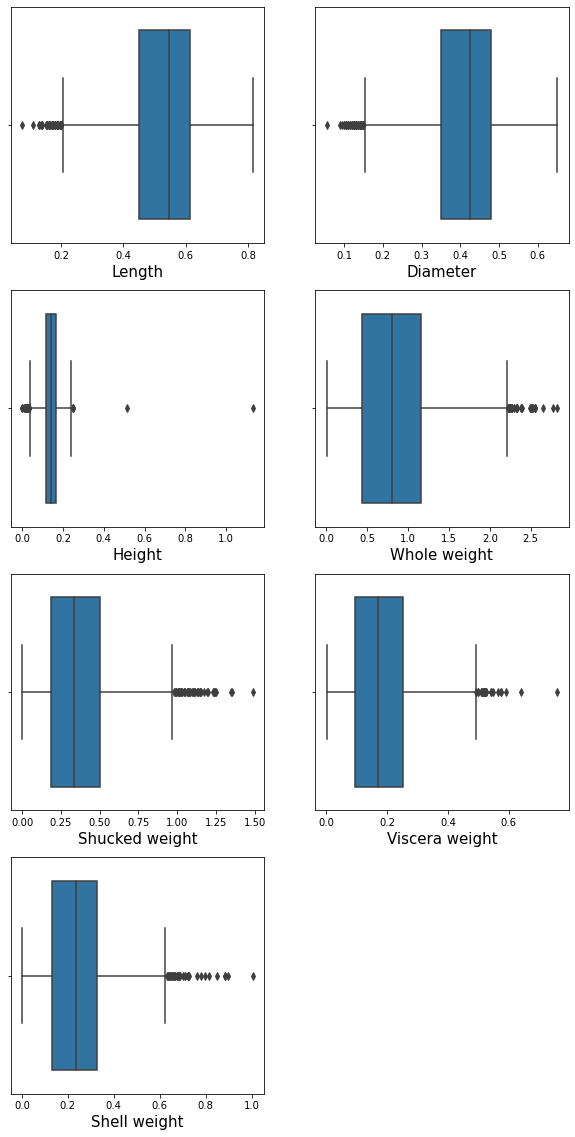

In [27]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df_features:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_features[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

We can see that most of the variables is having Outliers.we have to remove some amount of outliers,so that we cannot loose data.

# Outlier Removal by using Z-score

In [28]:
z_score = zscore(df[['Length','Diameter','Height',
                       'Whole weight','Shucked weight',
                       'Viscera weight', 'Shell weight']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<2).all(axis=1)

df=df[filtering_entry]
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000
mean,1.048557,0.525997,0.409405,0.138978,0.792120,0.343091,0.172752,0.228999,9.963852
std,0.824814,0.097634,0.081492,0.031871,0.396871,0.179276,0.089901,0.112436,2.963401
min,0.000000,0.285000,0.210000,0.060000,0.093500,0.031000,0.015000,0.027000,4.000000
25%,0.000000,0.460000,0.352500,0.115000,0.461750,0.195500,0.099000,0.135000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.784000,0.329000,0.167000,0.228000,9.000000
75%,2.000000,0.605000,0.475000,0.165000,1.101500,0.480000,0.239000,0.310500,11.000000
max,2.000000,0.730000,0.590000,0.220000,1.808500,0.802000,0.399000,0.516500,29.000000


In [29]:
df.shape

(3707, 9)

We didnt loose huge amount of data after using Zscore.

In [30]:
df.skew()

Sex              -0.090306
Length           -0.438035
Diameter         -0.422144
Height           -0.145494
Whole weight      0.189078
Shucked weight    0.290572
Viscera weight    0.289120
Shell weight      0.224801
Rings             1.305410
dtype: float64

We still have skewness in the columns.we will not loose data by cleaning much more.

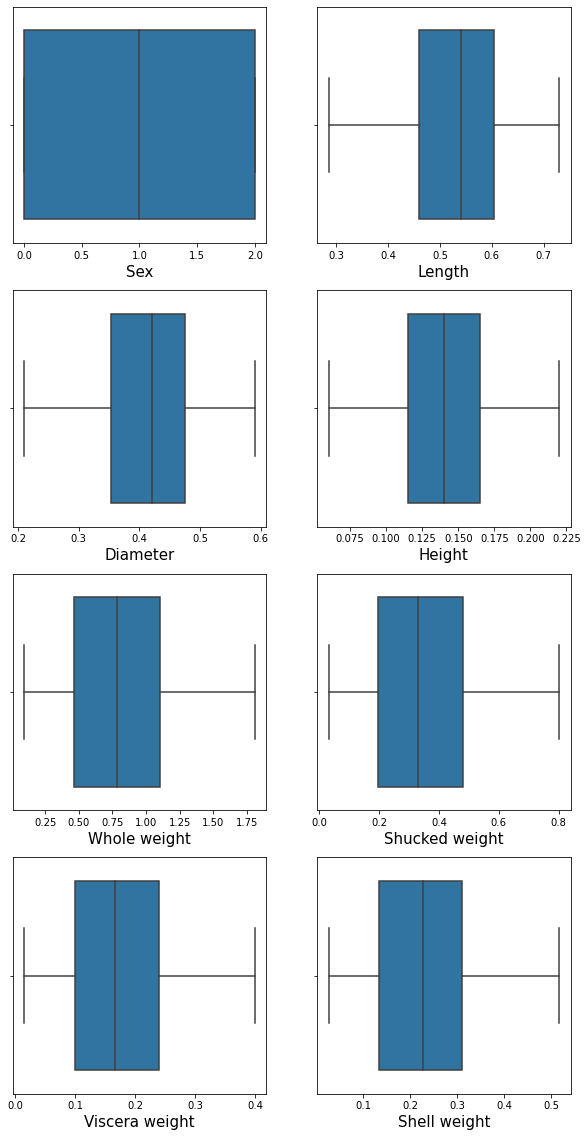

In [31]:
#Again Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Removed outliers from the columns,now we can cary on with the further steps.

# Standardization:-

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# VIF :

In [33]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


There is so much co-relation between the features.We cant loose dara further because we have very less columns in the dataset.

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# Model Creation:

# 1.K-Neighbors Regressor:

In [35]:
#Model training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [36]:
#Prediction with trained data
yknpred = kn.predict(x_train)

In [37]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.6587961089594592


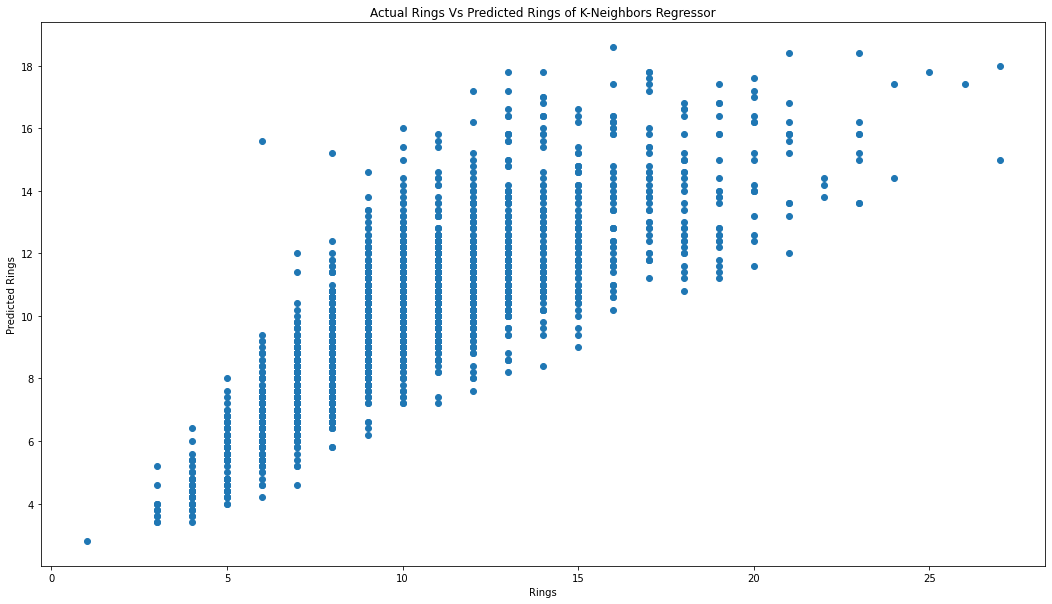

In [38]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings Vs Predicted Rings of K-Neighbors Regressor')
plt.show()

In [39]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [40]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.5038218520224076


In [41]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1.6440191387559808


In [42]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  5.387253588516747


In [43]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  2.3210457962988897


# 2. Support Vector Regression (SVR)

In [44]:
#Model Training
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [45]:
#Prediction with trained data:
ysvrpred = svr.predict(x_train)

In [46]:
print("R Square Score of svr:", metrics.r2_score(y_train,ysvrpred))

R Square Score of svr: 0.5575509382400794


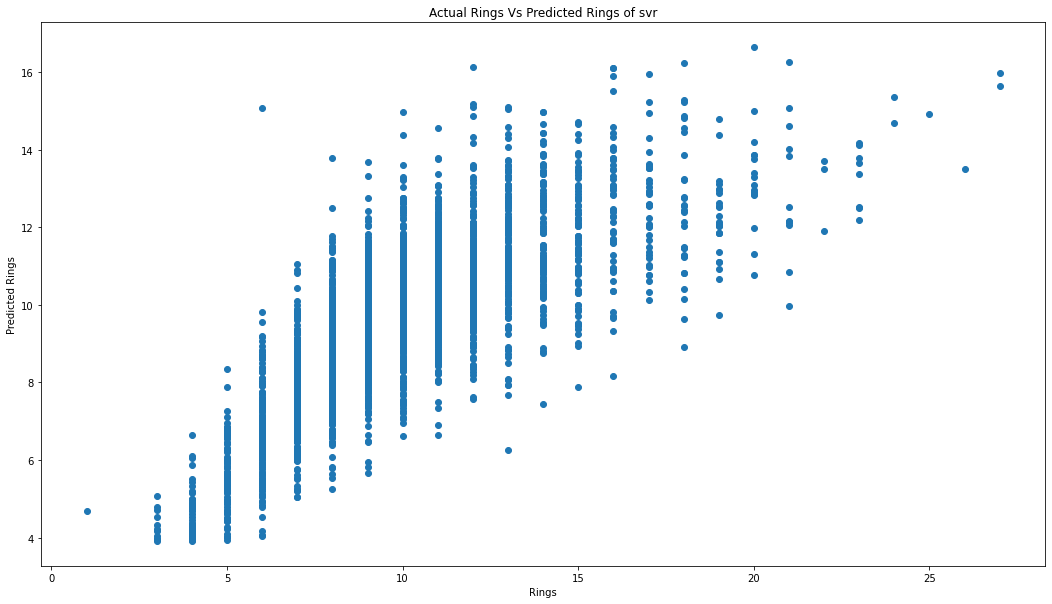

In [47]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ysvrpred)
plt.xlabel('Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings Vs Predicted Rings of svr')
plt.show()

In [48]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

In [49]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)

R Square Score of SVR: 0.5239089501527703


In [50]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  1.519659699736748


In [51]:
print ('mean squared error of SVR: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR:  5.169157947008223


In [52]:
print ('Root mean squared error of SVR: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR:  2.2735782253989467


# 3.Ada Boost Regressor

In [53]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [54]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [55]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.27556821769516615


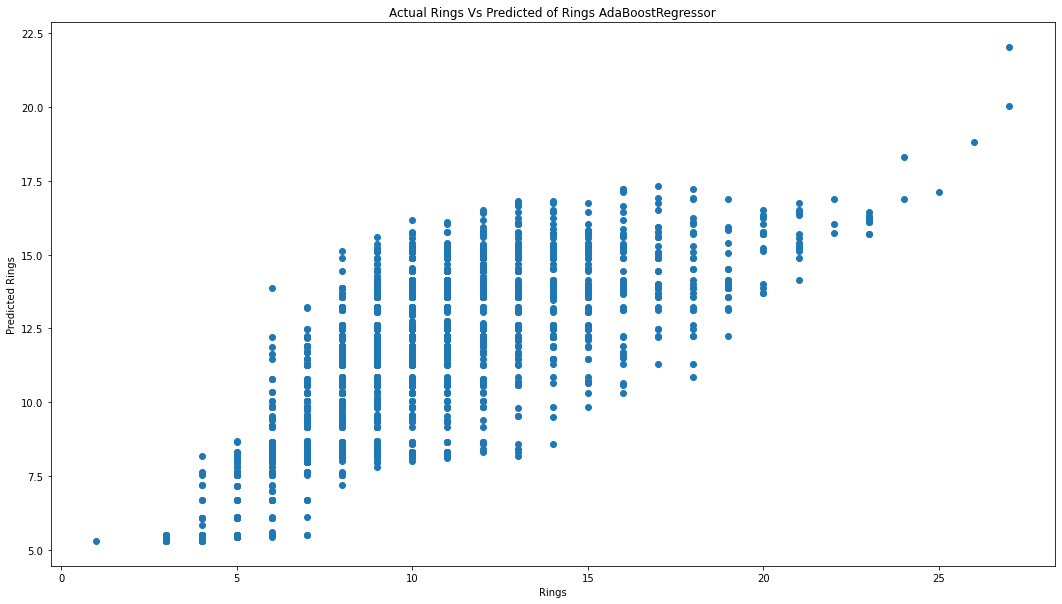

In [56]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings Vs Predicted of Rings AdaBoostRegressor')
plt.show()

In [57]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [58]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.26788848110748065


In [59]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  2.3892802250214187


In [60]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  7.948899852651889


In [61]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  2.819379338196953


# 4. Linear Regression:

In [62]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [64]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.5253356411955906


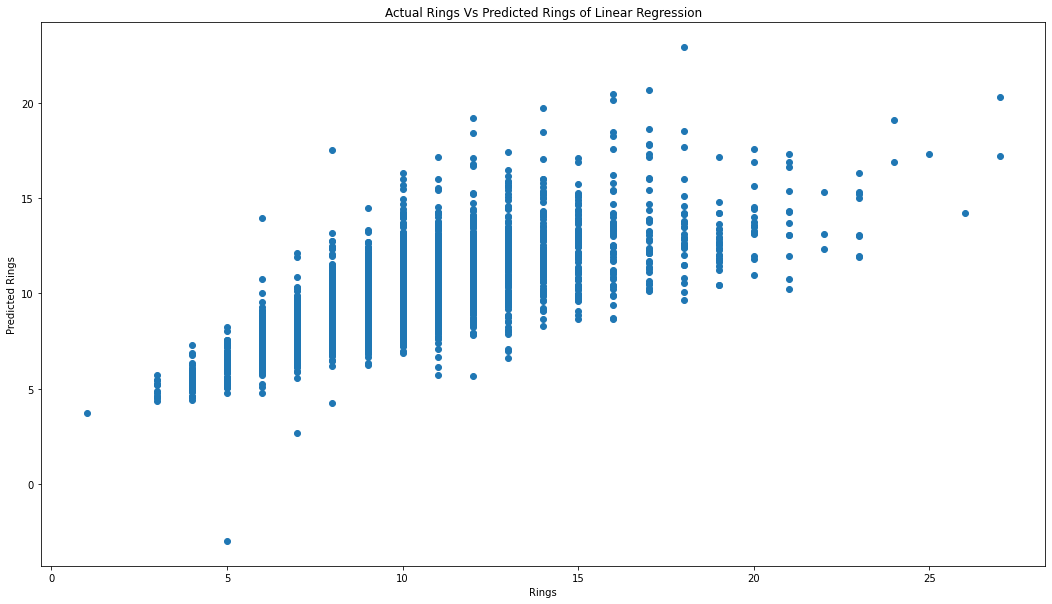

In [65]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings Vs Predicted Rings of Linear Regression')
plt.show()

In [66]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [67]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.5296374881577061


In [68]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  1.6067455824185557


In [69]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  5.106960353160462


In [70]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  2.259858480781587


# 5.Random ForestRegressor

In [71]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [73]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9353151874398656


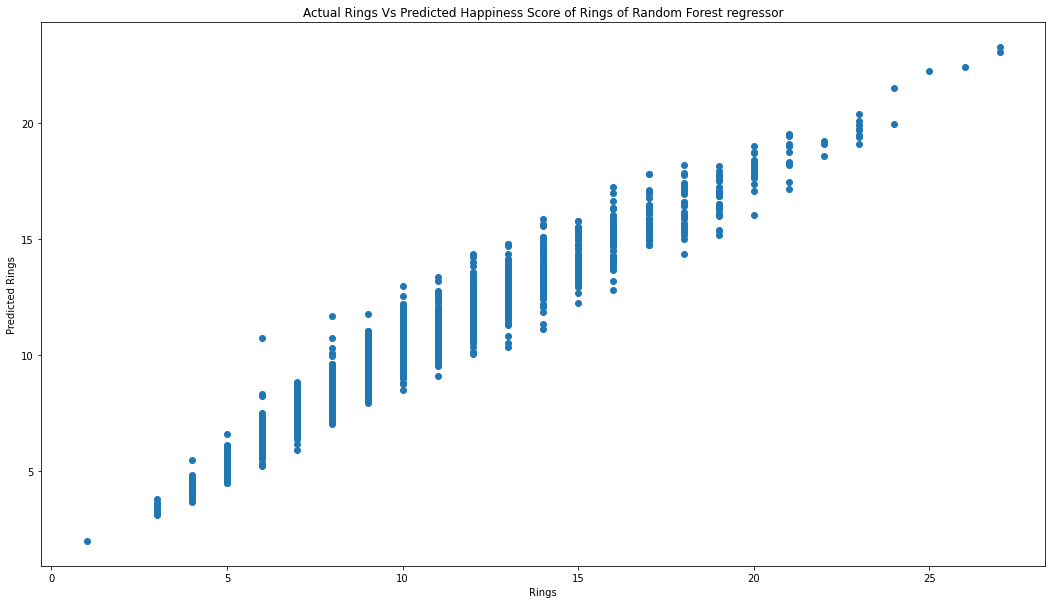

In [74]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings Vs Predicted Happiness Score of Rings of Random Forest regressor')
plt.show()

In [75]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [76]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.5444500646893813


In [77]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  1.5515406698564593


In [78]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  4.946132822966508


In [79]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  2.2239902929119335


# Regularization:

In [80]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [81]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

3.574976444462216e-05

In [82]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.574976444462216e-05)

In [83]:
lasso_reg.score(x_test,y_test)

0.5296347958509493

In [84]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [85]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [86]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [87]:
ridge_model.score(x_test,y_test)

0.5296373891502286

Both laso and Ridge is giving same score 52.9%.

# CROSS VALIDATION:

In [88]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.50426293 0.4634974  0.4810856  0.47758025 0.49613126]
mean : 0.48451148834834956


In [89]:
#CV of Support Vector Regressor
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean())

[0.5628997  0.52413458 0.53713533 0.52829858 0.54149165]
mean : 0.5387919692115869


In [90]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.27492466 0.04843808 0.27032633 0.27034847 0.26935676]
mean : 0.22667886253905561


In [91]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.57310921 0.51069895 0.43311964 0.50054652 0.52828079]
mean : 0.5091510213700011


In [92]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.59636542 0.51506159 0.53093352 0.53941174 0.51986262]
mean : 0.5403269785215886


Now we will check the differnce between the accuracy score and cross validation score to determine the best model.we will take the least differnce as the best model.

1.KNN-0.503-0.484=0.019
2.SVR-0.523-0.538=-0.015
3.Adaboost regressor-0.267-0.226=0.001
4.Linear regressor-0.529-0.509=0.02
5.Random forrest regressor-0.544-0.540=0.004

we found that Random forrest Regressor is having less difference,so selecting it as the best model for this dataset,to find the age of the abalones.


# Hyper Parameter tuninf of Random forrest model by using RandomizedsearchCV :

In [106]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [107]:
# Create the random grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [108]:
random_search=RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,cv=5,n_jobs=-1)

In [109]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [110]:
best_parameters=random_search.best_params_
print(best_parameters)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [111]:
rfr = RandomForestRegressor(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 4, max_features= 'auto', max_depth= 100, bootstrap= True)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.5488518009235535

After using hyperparameter tuning in Random Forest Model,we can see that there is no such change in differnce in Accuracy score,thus saving the Random forest model as the final model.

In [112]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rfr_abalone = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfr_abalone))

      predicted_values  orignal_values
1189         10.793611              12
342          10.728264              12
1581          8.773243               8
3021          9.540783               9
3325          8.256631              10
...                ...             ...
1569         10.457996               8
295           7.385253               6
2381          4.465778               5
3811          8.781433               9
4130         10.296183              10

[1045 rows x 2 columns]


In [113]:
# model prediction using DT
x_predict = list(rfr.predict(x_test))
dt_abalone = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(dt_abalone))

      predicted_values  orignal_values
1189         10.793611              12
342          10.728264              12
1581          8.773243               8
3021          9.540783               9
3325          8.256631              10
...                ...             ...
1569         10.457996               8
295           7.385253               6
2381          4.465778               5
3811          8.781433               9
4130         10.296183              10

[1045 rows x 2 columns]


In [114]:
#import joblib
import joblib

joblib.dump(rfr,'dt_abalone_file.obj')

# SAVING THE MODEL

['dt_abalone_file.obj']

In [115]:
rfr_from_joblib=joblib.load('dt_abalone_file.obj')
rfr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([10.79361066, 10.72826433,  8.77324274, ...,  4.46577807,
        8.78143305, 10.29618279])

# Conclusion:

Created this model to predict the age of the abalones by finding the rings,which is very time consuming process if done manually.now it will be much more helpful to determine the ages of the abalones,if we add new set of datas in this model.At first we saw that there are 4177 rows(nos of abalones) and 9 columns(charcteristics of Abalones).We saw most of the column is corelated to eachother and there is litte skewness and outliers,which is further removed by various techniques.Created five models to predict the highest accuracy score,from which we got very less accuracy score from the Adda boost Regressor model and the rest accuracy scores are between 50-55%,which is not enough to build a strong model.Then created hyper parameter tuning of Random forrest Regressor and got only 55% accuracy score,as we chose it as the best model after getting least differnce between the accuracy score and cross validation score.